# Q1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [23]:
import pandas as pd
import numpy as np

Basic Analysis

In [11]:
wal=pd.read_csv('megamart_data.csv')
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [34]:
wal.shape

(550068, 10)

In [70]:
wal.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
184451,1004447,P00329742,M,46-50,5,B,0,1,6,12021
499204,1004867,P00156442,M,26-35,16,A,3,0,8,7779
257630,1003713,P00140742,F,26-35,7,B,1,1,1,11891
397781,1001224,P00222242,M,51-55,13,B,4+,0,1,12037
46437,1001149,P00275842,M,26-35,12,A,1,1,2,10010


In [39]:
wal.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [41]:
wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [46]:
wal.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# Q2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

In [52]:
wal.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [58]:
wal.median(numeric_only=True)

User_ID             1003077.0
Occupation                7.0
Marital_Status            0.0
Product_Category          5.0
Purchase               8047.0
dtype: float64

Boxplot to detect outliers 

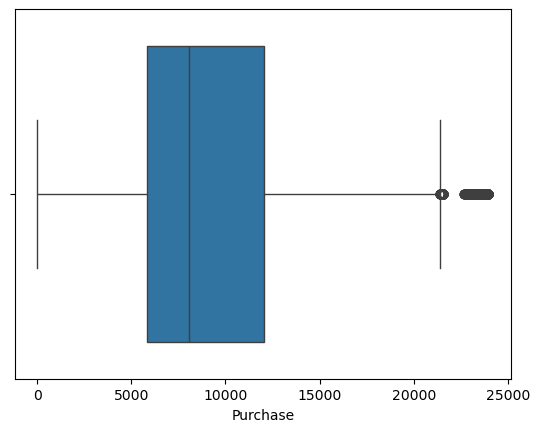

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=wal,x='Purchase')
plt.show()

Clipping of Data

In [117]:
wal['Purchase']=(np.clip(wal['Purchase'],np.round(wal['Purchase'].quantile(0.05),2),np.round(wal['Purchase'].quantile(0.95),2)))

# Q3. Data Exploration

Q3 A : Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results

In [185]:
customer_spend=wal.groupby('User_ID')['Purchase'].sum().reset_index()
customer_spend=customer_spend.merge(wal[['User_ID','Gender']].drop_duplicates(), on='User_ID')
avg_spent=customer_spend.groupby('Gender')['Purchase'].mean()
print(np.round(avg_spent,2))

Gender
F    712185.35
M    924335.96
Name: Purchase, dtype: float64


In [192]:
import scipy.stats as stats
wal_sample=wal.sample(100)
female_df=wal_sample[wal_sample['Gender']=='F']
sample_mean=female_df['Purchase'].mean()
sample_std=female_df['Purchase'].std()
sample_size=female_df.shape[0]
standard_error= sample_std/np.sqrt(sample_size)
confidence_level=0.95
z_value=stats.norm.ppf(1-(1-confidence_level)/2)
margin_of_error=z_value*standard_error
lower_bound=sample_mean-margin_of_error
upper_bound=sample_mean+margin_of_error
print(f"Sample Mean:{sample_mean}")
print(f"Sample Standard Deviation:{sample_std}")
print(f"Standard Error:{standard_error}")
print(f"Confidence Interval for the population mean (Customers, 95% Confidence):")
print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")


Sample Mean:7751.416666666667
Sample Standard Deviation:4658.526767651714
Standard Error:950.917794486979
Confidence Interval for the population mean (Customers, 95% Confidence):
Lower Bound:5887.6520372139275
Upper Bound:9615.181296119406


In [194]:
import scipy.stats as stats
female_df=wal[wal['Gender']=='F'].sample(100)
sample_mean=female_df['Purchase'].mean()
sample_std=female_df['Purchase'].std()
sample_size=female_df.shape[0]
standard_error= sample_std/np.sqrt(sample_size)
confidence_level=0.95
z_value=stats.norm.ppf(1-(1-confidence_level)/2)
margin_of_error=z_value*standard_error
lower_bound=sample_mean-margin_of_error
upper_bound=sample_mean+margin_of_error
print(f"Sample Mean:{sample_mean}")
print(f"Sample Standard Deviation:{sample_std}")
print(f"Standard Error:{standard_error}")
print(f"Confidence Interval for the population mean (Female Customers, 95% Confidence):")
print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")


Sample Mean:8369.04
Sample Standard Deviation:4764.302564665343
Standard Error:476.43025646653433
Confidence Interval for the population mean (Female Customers, 95% Confidence):
Lower Bound:7435.253856180412
Upper Bound:9302.82614381959


Inference : According to above results Males have higher Expenditure 

# Q4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

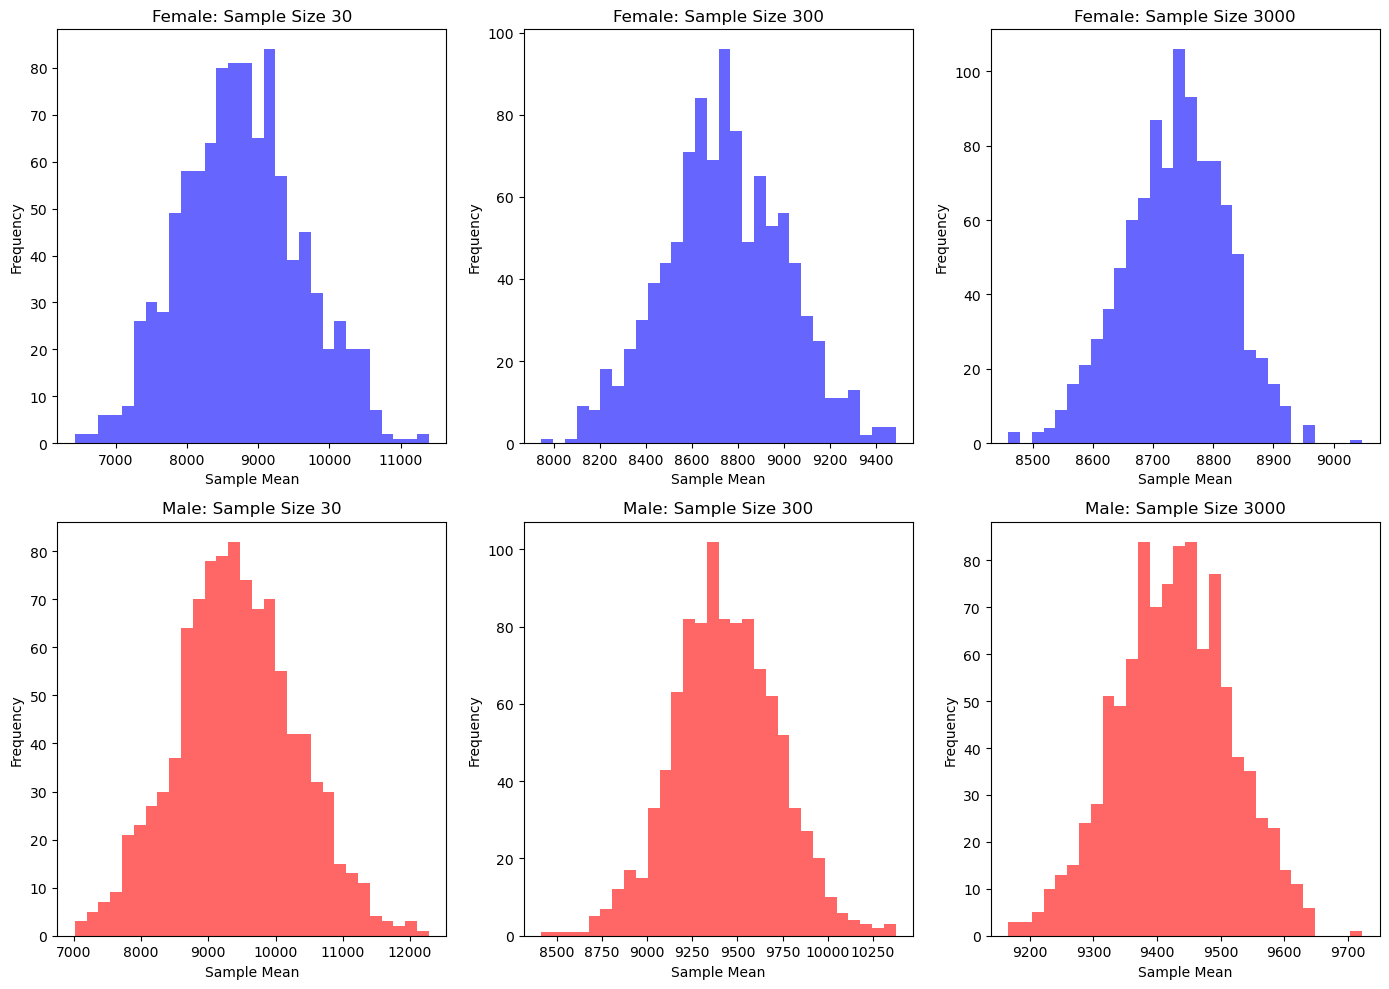

Female Confidence Interval (95%): (7091.5606762545,10381.519855963541)
Male Confidence Interval (95%):(7664.543568450405,11189.938424698808)


In [211]:
def clt_confidence_interval(data,sample_size,confidence_level):
    sample_mean=np.mean(data)
    sample_std=np.std(data, ddof=1)
    standard_error=sample_std / np.sqrt(sample_size)
    z_value=stats.norm.ppf(1-(1-confidence_level)/2)
    margin_of_error=z_value*standard_error
    lower_bound=sample_mean-margin_of_error
    upper_bound=sample_mean+margin_of_error
    return sample_mean,lower_bound,upper_bound
def simulate_sampling(data,sample_size,num_samples=1000,confidence_level=0.95):
    sample_means = []
    for _ in range(num_samples):
        sample=np.random.choice(data,size=sample_size,replace=False)
        sample_mean,lower,upper = clt_confidence_interval(sample,sample_size,confidence_level)
        sample_means.append(sample_mean)
    return sample_means
sample_sizes=[30,300,3000]
confidence_levels=[0.90,0.95,0.99]

female_data=wal[wal['Gender']=='F']['Purchase']
male_data=wal[wal['Gender']=='M']['Purchase']
plt.figure(figsize=(14, 10))
for idx,sample_size in enumerate(sample_sizes):
    plt.subplot(2,len(sample_sizes),idx+1)
    female_sample_means=simulate_sampling(female_data,sample_size,num_samples=1000,confidence_level=0.95)
    plt.hist(female_sample_means,bins=30,alpha=0.6,color='blue',label='Female')
    plt.title(f'Female: Sample Size {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.subplot(2,len(sample_sizes),len(sample_sizes)+idx + 1)
    male_sample_means=simulate_sampling(male_data, sample_size,num_samples=1000,confidence_level=0.95)
    plt.hist(male_sample_means,bins=30,alpha=0.6,color='red',label='Male')
    plt.title(f'Male: Sample Size {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
sample_size=30
female_mean,female_lower,female_upper=clt_confidence_interval(female_data,sample_size,confidence_level=0.95)
male_mean,male_lower,male_upper=clt_confidence_interval(male_data,sample_size,confidence_level=0.95)
print(f"Female Confidence Interval (95%): ({female_lower},{female_upper})")
print(f"Male Confidence Interval (95%):({male_lower},{male_upper})")

Inference : The confidence interval for Male seems sloghtly higher which implies that the varibility is existing in the expenditure.

# Q5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Megamart leverage this conclusion to make changes or improvements?

# Q6. Perform the same activity for Married vs Unmarried and Age.

--- Confidence Intervals for Age Group 0-17 ---
Sample Size: 30, Confidence Level: 90.0%
Estimated Mean: 8928.64, Confidence Interval: (7456.95, 10424.35)

Sample Size: 30, Confidence Level: 95.0%
Estimated Mean: 8936.37, Confidence Interval: (7172.71, 10708.59)

Sample Size: 30, Confidence Level: 99.0%
Estimated Mean: 9005.78, Confidence Interval: (6617.19, 11264.11)

Sample Size: 300, Confidence Level: 90.0%
Estimated Mean: 8933.33, Confidence Interval: (8471.46, 9409.84)

Sample Size: 300, Confidence Level: 95.0%
Estimated Mean: 8948.95, Confidence Interval: (8381.58, 9499.72)

Sample Size: 300, Confidence Level: 99.0%
Estimated Mean: 8931.89, Confidence Interval: (8205.91, 9675.39)

Sample Size: 3000, Confidence Level: 90.0%
Estimated Mean: 8941.67, Confidence Interval: (8792.28, 9089.02)

Sample Size: 3000, Confidence Level: 95.0%
Estimated Mean: 8936.20, Confidence Interval: (8763.86, 9117.44)

Sample Size: 3000, Confidence Level: 99.0%
Estimated Mean: 8936.19, Confidence Interva

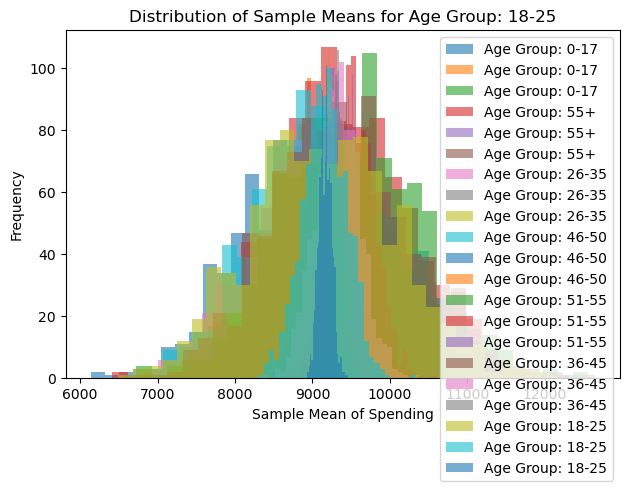

In [221]:
def clt_confidence_interval(data, sample_size, confidence_level):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_value * standard_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return sample_mean, lower_bound, upper_bound
def simulate_sampling(data, sample_size, num_samples=1000, confidence_level=0.95):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_mean, lower, upper = clt_confidence_interval(sample, sample_size, confidence_level)
        sample_means.append(sample_mean)   
    return sample_means
sample_sizes = [30, 300, 3000]
confidence_levels = [0.90, 0.95, 0.99]
for age_bin in wal['Age'].unique():
    print(f"--- Confidence Intervals for Age Group {age_bin} ---")
    age_group_data = wal[wal['Age'] == age_bin]['Purchase']
    
    for sample_size in sample_sizes:
        for confidence_level in confidence_levels:
            sample_means = simulate_sampling(age_group_data, sample_size, num_samples=1000, confidence_level=confidence_level)
            sample_mean = np.mean(sample_means)
            lower_bound, upper_bound = clt_confidence_interval(age_group_data, sample_size, confidence_level)[1:]
            print(f"Sample Size: {sample_size}, Confidence Level: {confidence_level*100}%")
            print(f"Estimated Mean: {sample_mean:.2f}, Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})\n")
        plt.hist(sample_means, bins=30, alpha=0.6, label=f'Age Group: {age_bin}')
        plt.title(f"Distribution of Sample Means for Age Group: {age_bin}")
        plt.xlabel('Sample Mean of Spending')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [222]:
wal['Marital_Status'].unique()

array([0, 1], dtype=int64)

--- Confidence Intervals for Marital Status: 1 ---
Sample Size: 10, Confidence Level: 90.0%
Estimated Mean: 9366.87, Confidence Interval: (6734.34, 11773.00)

Sample Size: 10, Confidence Level: 95.0%
Estimated Mean: 9227.28, Confidence Interval: (6251.70, 12255.64)

Sample Size: 10, Confidence Level: 99.0%
Estimated Mean: 9218.00, Confidence Interval: (5308.41, 13198.93)

Sample Size: 30, Confidence Level: 90.0%
Estimated Mean: 9212.92, Confidence Interval: (7799.13, 10708.21)

Sample Size: 30, Confidence Level: 95.0%
Estimated Mean: 9223.30, Confidence Interval: (7520.48, 10986.86)

Sample Size: 30, Confidence Level: 99.0%
Estimated Mean: 9253.58, Confidence Interval: (6975.88, 11531.46)

Sample Size: 100, Confidence Level: 90.0%
Estimated Mean: 9265.83, Confidence Interval: (8456.99, 10050.35)

Sample Size: 100, Confidence Level: 95.0%
Estimated Mean: 9269.75, Confidence Interval: (8304.36, 10202.98)

Sample Size: 100, Confidence Level: 99.0%
Estimated Mean: 9261.53, Confidence Inter

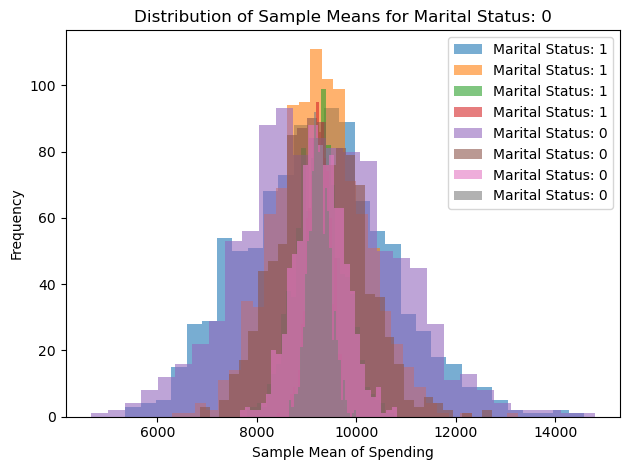

In [225]:
marital_statuses = [1,0]
def clt_confidence_interval(data, sample_size, confidence_level):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)
    z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_value * standard_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    return sample_mean, lower_bound, upper_bound

def simulate_sampling(data, sample_size, num_samples=1000, confidence_level=0.95):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_mean, lower, upper = clt_confidence_interval(sample, sample_size, confidence_level)
        sample_means.append(sample_mean)     
    return sample_means
sample_sizes = [10, 30, 100, 500]
confidence_levels = [0.90, 0.95, 0.99]
for marital_status in marital_statuses:
    print(f"--- Confidence Intervals for Marital Status: {marital_status} ---")
    marital_group_data = wal[wal['Marital_Status'] == marital_status]['Purchase']
    for sample_size in sample_sizes:
        for confidence_level in confidence_levels:
            sample_means = simulate_sampling(marital_group_data, sample_size, num_samples=1000, confidence_level=confidence_level)
            sample_mean = np.mean(sample_means)
            lower_bound, upper_bound = clt_confidence_interval(marital_group_data, sample_size, confidence_level)[1:]
            print(f"Sample Size: {sample_size}, Confidence Level: {confidence_level*100}%")
            print(f"Estimated Mean: {sample_mean:.2f}, Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})\n")
        plt.hist(sample_means, bins=30, alpha=0.6, label=f'Marital Status: {marital_status}')
        plt.title(f"Distribution of Sample Means for Marital Status: {marital_status}")
        plt.xlabel('Sample Mean of Spending')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# q7. Give recommendations and action items to Megamart.